In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import matplotlib.dates as mdates

In [2]:
#Reading hdr and img files Seperately#
arr_hdrVH= []
arr_hdrVV= []
arr_imgVH= []
arr_imgVV= []
for file in os.listdir():
    if file.endswith(".hdr") and file[8]== 'H':
          arr_hdrVH= np.append(arr_hdrVH, file)
    if file.endswith(".hdr") and file[8]== 'V':
          arr_hdrVV= np.append(arr_hdrVV, file)
    if file.endswith(".img") and file[8]== 'H':
          arr_imgVH= np.append(arr_imgVH, file)
    if file.endswith(".img") and file[8]== 'V':
          arr_imgVV= np.append(arr_imgVV, file)             

In [3]:
#SORTING FILE ARRAYS IN DATE-ORDER#

#For viewing full data frame:
#pd.set_option("display.max_rows", None, "display.max_columns", None)

#HDR-VH
arr_hdrVH_split = np.empty([1,6], str)                                #For spliting into seperate naming parts
for i in range(0, len(arr_hdrVH)):
    under_split     = arr_hdrVH[i].split('_')                         #Spliting all the underscores
    per_split       = under_split[-1].split('.')                      #Spliting the file extension
    tot_split       = np.append(under_split[0:4], per_split)          #Appending the full (split) file name
    arr_hdrVH_split = np.append(arr_hdrVH_split, [tot_split], axis=0) #Making matrix of all filenames
    
df_hdrVH         = pd.DataFrame(arr_hdrVH_split[1:])                  #Converting Matrix to dataframe
df_hdrVH.columns = ['Col 1', 'Polarization', 'Intensity [units]', 'Order #', 'Date', 'File Ext.'] 
df_hdrVH['Date'] = pd.to_datetime(df_hdrVH.Date)                      #Converting dates to datetime format
df_hdrVH.sort_values(by=['Date'], ignore_index=True, inplace=True)    #Sorting by dates, ignore~sets ascending index
                                                                      #& inplace~saves newly sorted dataframe
#HDR-VV
arr_hdrVV_split = np.empty([1,6], str)
for i in range(0, len(arr_hdrVV)):
    under_split     = arr_hdrVV[i].split('_')
    per_split       = under_split[-1].split('.')
    tot_split       = np.append(under_split[0:4], per_split)
    arr_hdrVV_split = np.append(arr_hdrVV_split, [tot_split], axis=0)
    
df_hdrVV         = pd.DataFrame(arr_hdrVV_split[1:])
df_hdrVV.columns = ['Col 1', 'Polarization', 'Intensity [units]', 'Order #', 'Date', 'File Ext.'] 
df_hdrVV['Date'] = pd.to_datetime(df_hdrVV.Date)
df_hdrVV.sort_values(by=['Date'], ignore_index=True, inplace=True)

#IMG-VH
arr_imgVH_split = np.empty([1,6], str)
for i in range(0, len(arr_imgVH)):
    under_split     = arr_imgVH[i].split('_')
    per_split       = under_split[-1].split('.')
    tot_split       = np.append(under_split[0:4], per_split)
    arr_imgVH_split = np.append(arr_imgVH_split, [tot_split], axis=0)
    
df_imgVH         = pd.DataFrame(arr_imgVH_split[1:])
df_imgVH.columns = ['Col 1', 'Polarization', 'Intensity [units]', 'Order #', 'Date', 'File Ext.'] 
df_imgVH['Date'] = pd.to_datetime(df_imgVH.Date)
df_imgVH.sort_values(by=['Date'], ignore_index=True, inplace=True)

#IMG-VV
arr_imgVV_split = np.empty([1,6], str)
for i in range(0, len(arr_imgVV)):
    under_split     = arr_imgVV[i].split('_')
    per_split       = under_split[-1].split('.')
    tot_split       = np.append(under_split[0:4], per_split)
    arr_imgVV_split = np.append(arr_imgVV_split, [tot_split], axis=0)
    
df_imgVV        = pd.DataFrame(arr_imgVV_split[1:])
df_imgVV.columns= ['Col 1', 'Polarization', 'Intensity [units]', 'Order #', 'Date', 'File Ext.'] 
df_imgVV['Date'] = pd.to_datetime(df_imgVV.Date)
df_imgVV.sort_values(by=['Date'], ignore_index=True, inplace=True)


In [4]:
#Can uncomment to view data frame of files
#df_hdrVH

In [15]:
#Choosing Pixel number
x = 2000
y = 1800

#Empty array for choosen point data
data_pnt = []

for i in range(0, len(df_hdrVH)):
    #File Name Parts
    one= df_hdrVH.loc[i, 'Col 1']
    pol= df_hdrVH.loc[i, 'Polarization']
    ing= df_hdrVH.loc[i, 'Intensity [units]']
    ore= df_hdrVH.loc[i, 'Order #']
    dt1= df_hdrVH.loc[i, 'Date']
    dt2= dt1.strftime("%d%b%Y")
    ext= df_hdrVH.loc[i, 'File Ext.']
    und= '_'
    per= '.'
    img= 'img'

    #Full File Name
    hdr    = [one+und+pol+und+ing+und+ore+und+dt2+per+ext]
    hdr_str= ''.join(hdr) #Converting list to string

    #Getting Image Info
    file= open(hdr_str, 'r')
    lines = file.readlines()

    col1= lines[2].split('\n') #Number of Columns in Image 
    col2= col1[0].split(' = ')                     
    col3= int(col2[1])

    row1= lines[3].split('\n') #Number of Rows in Image 
    row2= row1[0].split(' = ')
    row3= int(row2[1])

    dat1= lines[7].split('\n') #Data Type 
    dat2= dat1[0].split(' = ')
    dat3= dat2[1] 

    if dat3 == '1': #byte
        dat3 = 'c'

    if dat3 == '2': #integer
        dat3 = 'i'

    if dat3 == '4': #float
        dat3 = 'f'

    if dat3== '5': #double
        dat3 = 'd'

    byt1= lines[9].split('\n') #Byte Order 
    byt2= byt1[0].split(' = ')
    byt3= byt2[1] 

    if byt3 == '0': #little-endian
        byt3 = '<'

    if byt3 == '1': #big-endian
        byt3 = '>'

    #Reading IMG File Data
    filename = [one+und+pol+und+ing+und+ore+und+dt2+per+img]
    img_str  = ''.join(filename)
    shape    = (row3, col3)
    dtype    = np.dtype(byt3+dat3)

    fid = open(img_str, 'rb')
    globals()['data' + und + pol + und + dt2] = np.fromfile(fid, dtype) 
    globals()['image'+ und + pol + und + dt2] = globals()['data' + und + pol + und + dt2].reshape(shape)

    #Setting Master File
    if ore == 'mst':
        globals()['master'+ und + pol] = globals()['data' + und + pol + und + dt2].reshape(shape)

    #Plotting specified point
    pnt = globals()['image'+ und + pol + und + dt2][x,y]
    data_pnt = np.append(data_pnt, pnt)

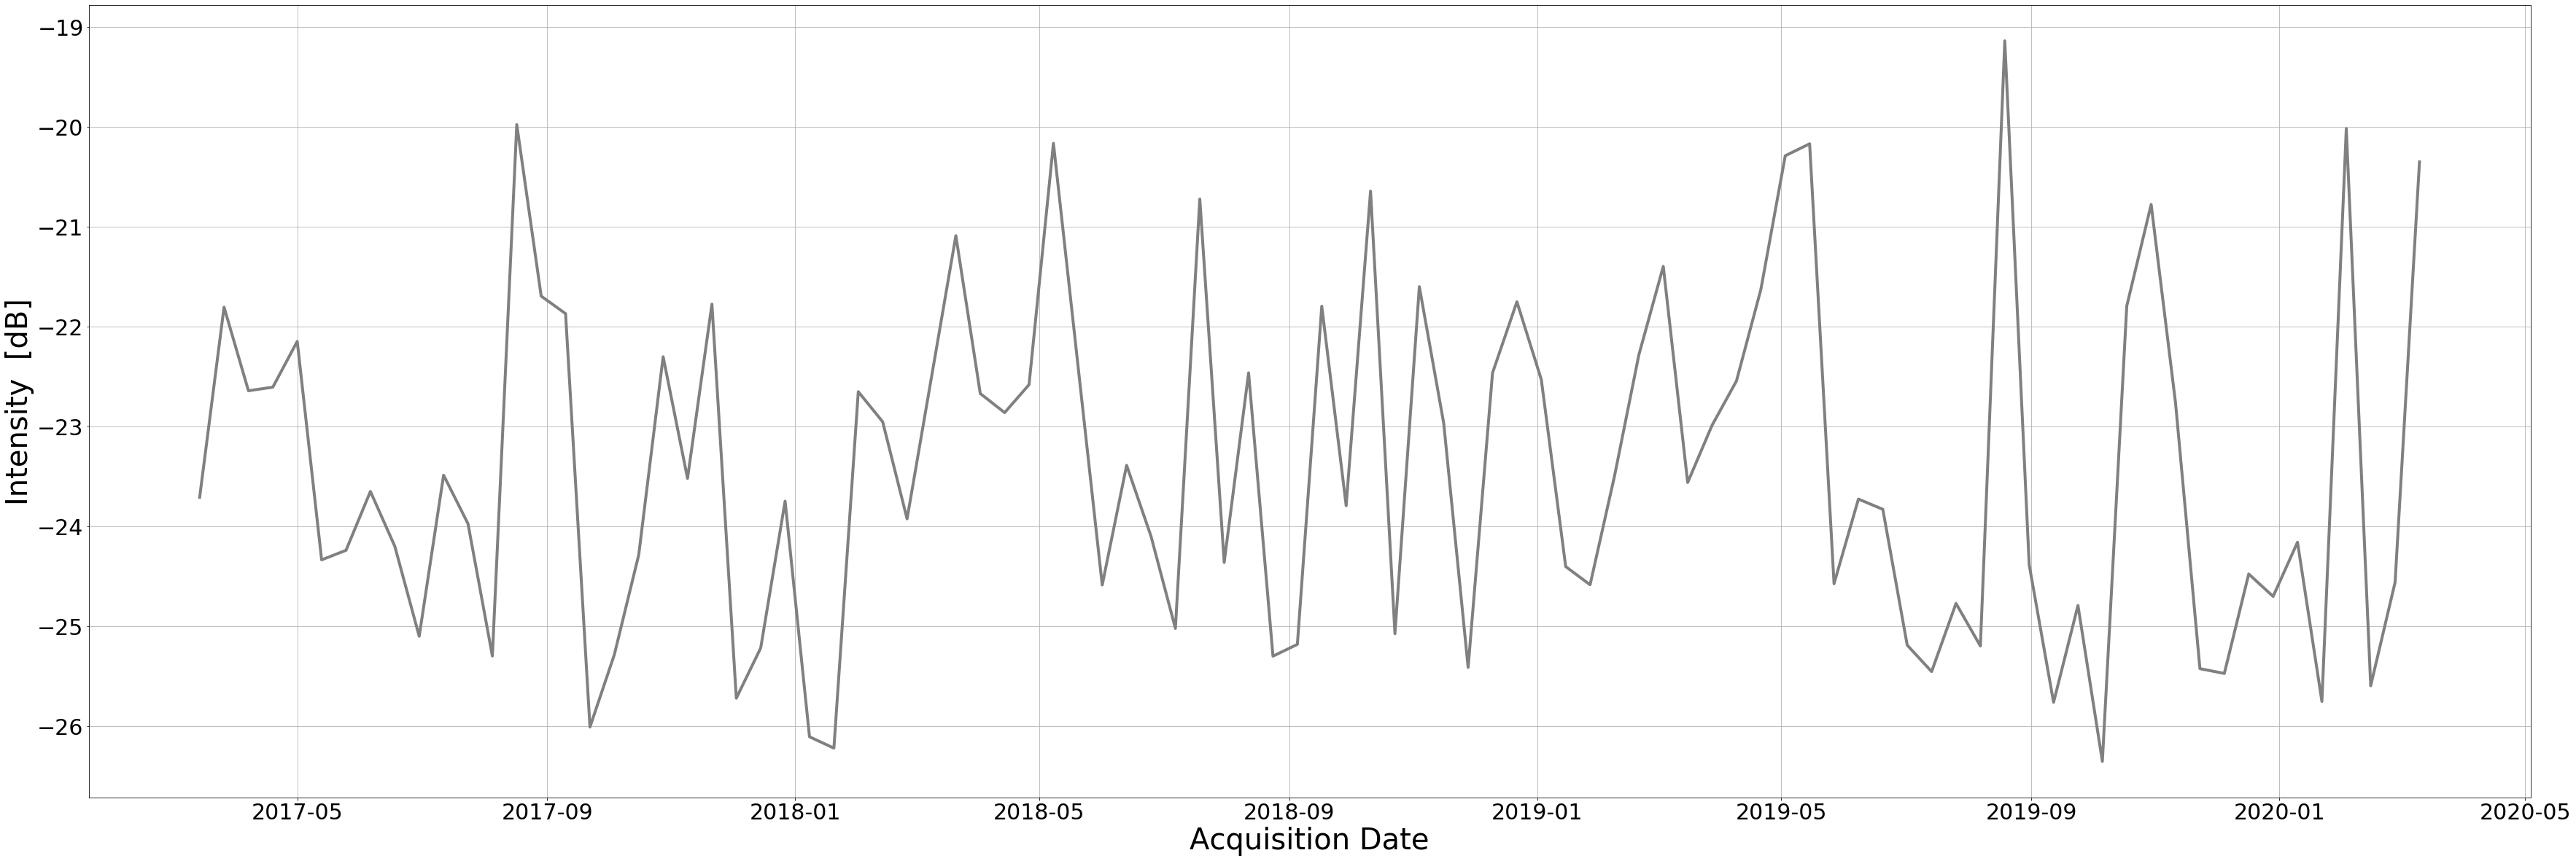

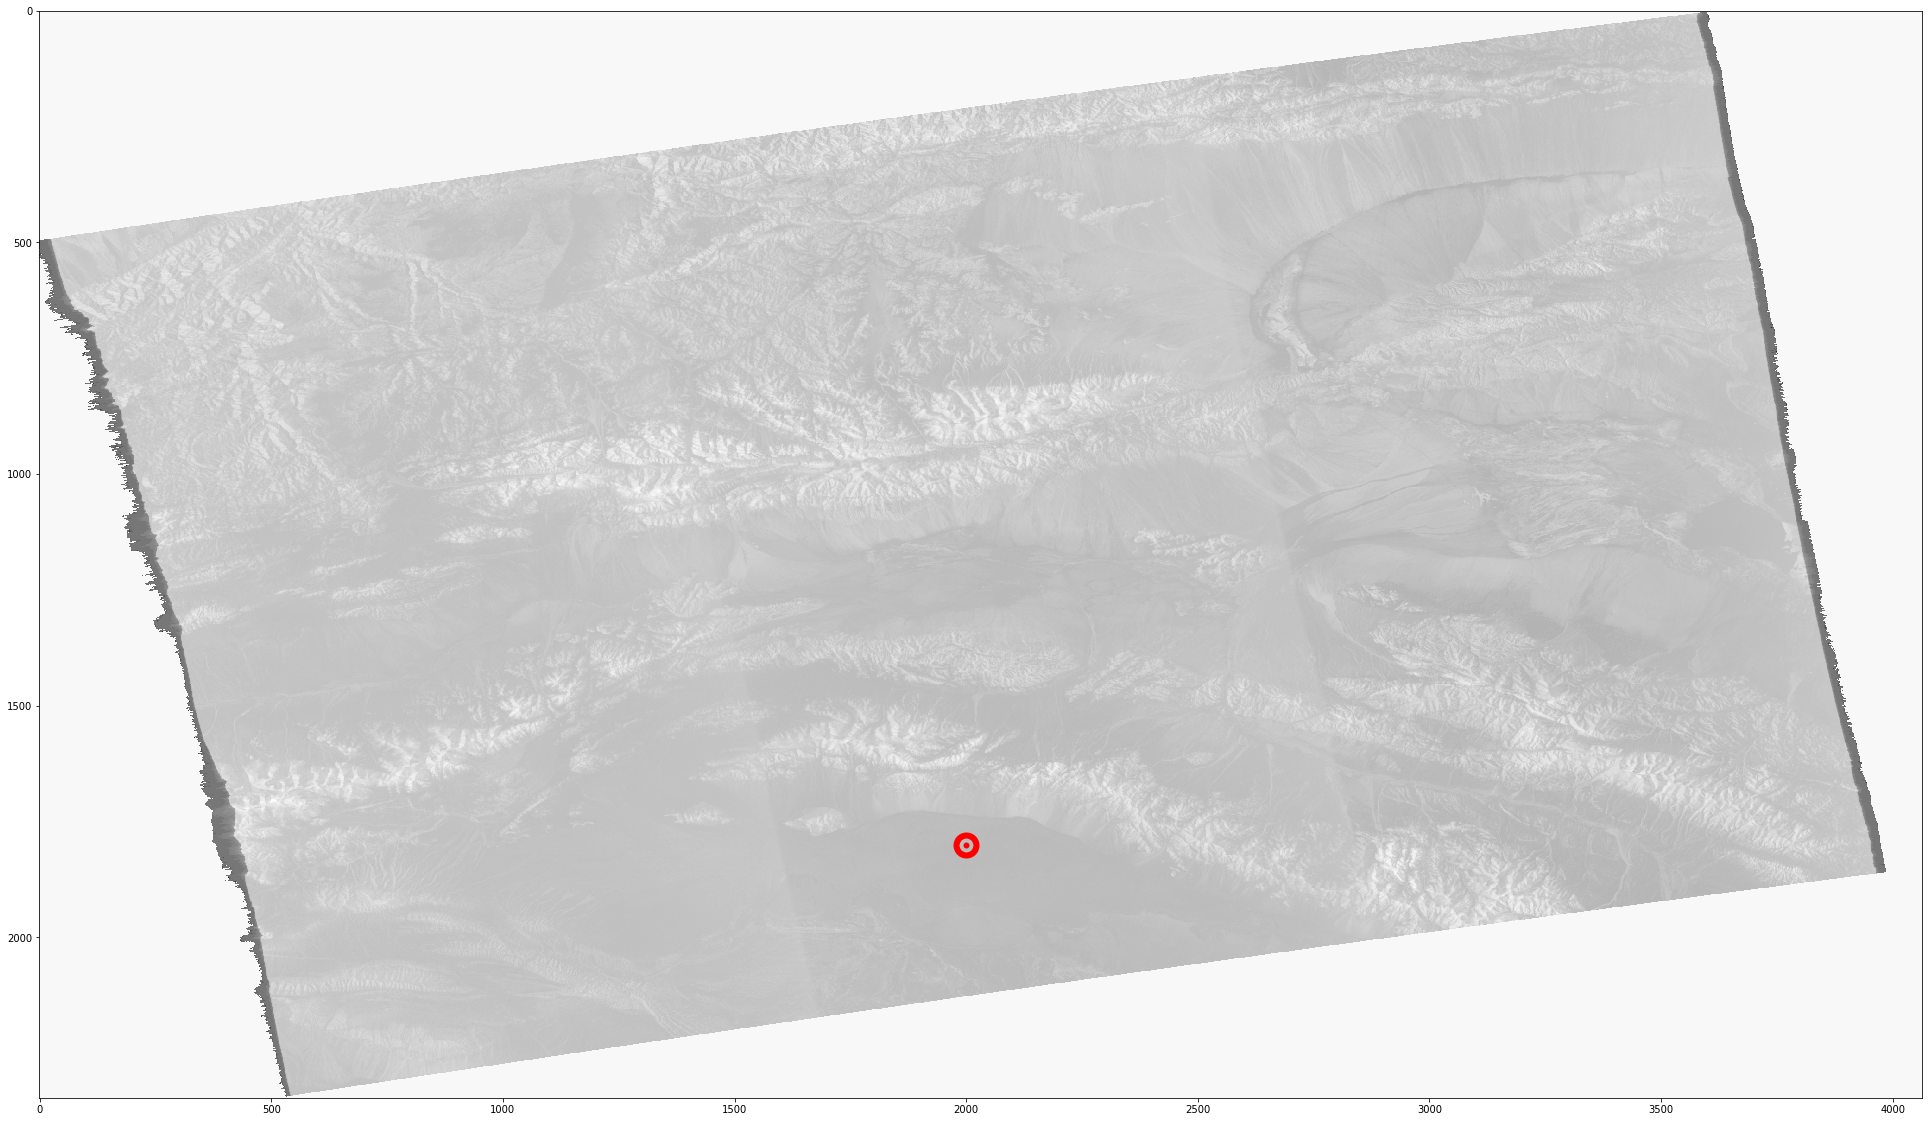

In [16]:
#Plotting Specified Point

##setting up plot
fig = plt.figure(figsize = (60,20))
ax1 = fig.add_subplot(111)

##formatting 
output_filename = "master_vh.PNG"

plt.grid(b=bool)    
plt.xticks(fontsize= 30)
plt.yticks(fontsize= 30)
plt.xlabel('Acquisition Date', fontsize=40) 
plt.ylabel('Intensity  [dB]',  fontsize=40)

##actual plot
dates = df_hdrVH['Date']
pnt_plt = ax1.plot(dates, data_pnt, c='grey', linewidth=4)

##plotting point on image 
fig2=plt.figure(figsize = (60,20))
ax2 = fig2.add_subplot(111)
he = x
yo = y
heyyo= ax2.scatter(he,yo, c='r', linewidth=20)

##showing master image
plt.imshow(master_VH, cmap = 'gray')
plt.savefig(output_filename)
plt.show()

In [ ]:
#This is the version for calculating standard dev.
"""
data_pnt = []

for k in range(0, 4064): 
        for j in range(0, 2347):
#Opening HDR file to get image info
            for i in range(0, len(df_hdrVH)):
                #File Name Parts
                one= df_hdrVH.loc[i, 'Col 1']
                pol= df_hdrVH.loc[i, 'Polarization']
                ing= df_hdrVH.loc[i, 'Intensity [units]']
                ore= df_hdrVH.loc[i, 'Order #']
                dt1= df_hdrVH.loc[i, 'Date']
                dt2= dt1.strftime("%d%b%Y")
                ext= df_hdrVH.loc[i, 'File Ext.']
                und= '_'
                per= '.'
                img= 'img'

                #Full File Name
                hdr    = [one+und+pol+und+ing+und+ore+und+dt2+per+ext]
                hdr_str= ''.join(hdr) #Converting list to string

                #Getting Image Info
                file= open(hdr_str, 'r')
                lines = file.readlines()

                col1= lines[2].split('\n') #Number of Columns in Image 
                col2= col1[0].split(' = ')                     
                col3= int(col2[1])

                row1= lines[3].split('\n') #Number of Rows in Image 
                row2= row1[0].split(' = ')
                row3= int(row2[1])

                dat1= lines[7].split('\n') #Data Type 
                dat2= dat1[0].split(' = ')
                dat3= dat2[1] 

                if dat3 == '1': #byte
                    dat3 = 'c'

                if dat3 == '2': #integer
                    dat3 = 'i'

                if dat3 == '4': #float
                    dat3 = 'f'

                if dat3== '5': #double
                    dat3 = 'd'

                byt1= lines[9].split('\n') #Byte Order 
                byt2= byt1[0].split(' = ')
                byt3= byt2[1] 

                if byt3 == '0': #little-endian
                    byt3 = '<'

                if byt3 == '1': #big-endian
                    byt3 = '>'

            #Reading IMG File Data
                filename = [one+und+pol+und+ing+und+ore+und+dt2+per+img]
                img_str  = ''.join(filename)
                shape    = (row3, col3)
                dtype    = np.dtype(byt3+dat3)

                fid = open(img_str, 'rb')
                globals()['data' + und + pol + und + dt2] = np.fromfile(fid, dtype) 
                globals()['image'+ und + pol + und + dt2] = globals()['data' + und + pol + und + dt2].reshape(shape)

            #Setting Master File
                if ore == 'mst':
                    globals()['master'+ und + pol] = globals()['data' + und + pol + und + dt2].reshape(shape)

            #Plotting specified point
                pnt = globals()['image'+ und + pol + und + dt2][k,j]
                data_pnt = np.append(data_pnt, pnt)
                globals()['std'+ und + dt2 + und + pol]= np.std(data_pnt)
"""


In [ ]:
##The rest is testing for clicking an image##

In [1]:
import numpy as np 
import cv2

def draw_circle(event,x,y,flags,param):
    global mouseX,mouseY
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img,(x,y),100,(255,0,0),-1)
        mouseX,mouseY = x,y

In [2]:
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
cv2.imshow('image', img)
#cv2.waitKey()

In [ ]:
while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(20) & 0xFF
    if k == 27:
        break
    elif k == ord('a'):
        print (mouseX,mouseY)

In [51]:
"""
input_filename = 'Sigma0_VV_db_slv176_10Mar2020.img'
shape= (2347, 4064) # matrix size- row, columns
dtype = np.dtype('>f') # big-endian float
output_filename = "JPCLN001.PNG"

fid = open(input_filename, 'rb')
data = np.fromfile(fid, dtype)
image = data.reshape(shape)

# Display.
plt.figure(figsize = (60,20))
plt.imshow(image, cmap = 'gray')
#plt.savefig(output_filename)
plt.show()
"""

'\ninput_filename = \'Sigma0_VV_db_slv176_10Mar2020.img\'\nshape= (2347, 4064) # matrix size- row, columns\ndtype = np.dtype(\'>f\') # big-endian float\noutput_filename = "JPCLN001.PNG"\n\nfid = open(input_filename, \'rb\')\ndata = np.fromfile(fid, dtype)\nimage = data.reshape(shape)\n\n# Display.\nplt.figure(figsize = (60,20))\nplt.imshow(image, cmap = \'gray\')\n#plt.savefig(output_filename)\nplt.show()\n'